# Unsupervised Machine Learning with Scikit-learn


#### Types of ML

![](ml_types2.png)

Unsupervised ML:  use of unlabeled data for training 
+ The systems tries to learn without a teacher
+ You are not given a target value/label that you are to predict the outcome as
+ We only have the independent variables(x) and no target/dependent variable(y) in these problems.


#### Libraries
+ pandas
+ scikit-learn
+ pycaret
+ hdbscan

#### Types of UML Algorithms
+ Clustering
+ Anomaly Detection:outlier detection
+ Novelty Detection:
+ Visualization
+ Dimensionality Reduction:simplify data without losing too much info by merging correlated features into one
+ Association Rule Learning:discovering interesting relations btwn attributes

    
#### Clustering Unsupervised ML Task
+ Clustering:
    - The process of grouping dataset in to groups in such a way that similar datapoints are in the same group
    - Usefulness
        - EDA
        - Pattern Recognition
        - Image Analysis
        + For working with unlabelled data
        + Search engines image search
        + Customer segmentation
        + Market segmentation
        + Outlier Detection
        + clustering similar documents together, 
        + recommending similar songs or movies,


#### Types of Clustering
+ Flat vs Hierarchical
+ Centroid Based vs Density Based


![](mlclassifiers.png)


#### Basic Principle Behind Clustering
All are based on different distance measures. 
 
 + K-Means (distance between points), 
 + Affinity propagation (graph distance), 
 + Mean-shift (distance between points), 
 + DBSCAN (distance between nearest points), 
 + Gaussian mixtures (Mahalanobis distance to centers), 
 + Spectral clustering (graph distance), etc.

#### Terms
+ Centroid: a data point at the center of a group/cluster


#### Data Source
<!-- + https://archive.ics.uci.edu/ml/datasets -->

### Clustering using KMeans Algorithm
+ Kmeans(Lloyd Forgy Algorithm)
+ MiniBatchKmeans

#### Benefits
+ Fast and Scalable


#### Demerits
+ Need to know th number of clusters
+ problem of having to pre-define the number of clusters.
    - Elbow Method/Silhoutte Method
    - Hierarchical Clustering:
+ Varying sizes and different densities may affect performance
    - scaling


#### Terms
+ k = number of clusters
+ .label_: index of cluster 
+ .cluster_centers_: centroid
+ .inertia_: performance metric of mean sq distance btwn each instance and its closest centroid



#### Task
+ Find the different clusters
+ Customer segmentation
    - Different types of customer/buyers in a market

## Data Preprocessing
This is the cleaning and modeling the data into a format which can be used by various clustering models we would be addressing.
Some of these issues addressed would be:
+ Handling empty cells
+ Handling duplicated cells
+ Handling irrelevant features

###### Importing all required libraries and data

In [ ]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


#Load Dataset
df = pd.read_csv('Customer_Data.csv')

In [ ]:
print("THE TOP 6 ROWS OF THE DATA IN CONSIDERATION WHICH WAS IMPORTED IN THE PREVIOUS CELL cell")
print("--"*100,"\n")
df.head(6)


THE TOP 6 ROWS OF THE DATA IN CONSIDERATION WHICH WAS IMPORTED IN THE PREVIOUS CELL cell
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [ ]:
print("BOTTOM 6 ROWS OF THE DATA IN CONSIDERATION WHICH WAS IMPORTED IN THE PREVIOUS CELL")
print("--"*100,"\n")
df.tail(6)


BOTTOM 6 ROWS OF THE DATA IN CONSIDERATION WHICH WAS IMPORTED IN THE PREVIOUS CELL
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [ ]:
print("There are {} rows and {} columns present in the dataset\n".format(df.shape[0],df.shape[1]))
# print(df.shape)

There are 8950 rows and 18 columns present in the dataset



In [ ]:

print("STRUCTURE OF THE DATA")
print("--"*100,"\n")
df.info()


STRUCTURE OF THE DATA
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY       

In [ ]:

print("DISCRIPTIVE STATISTICS OF THE DATA")
print("--"*100,"\n")
df.describe()

DISCRIPTIVE STATISTICS OF THE DATA
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Checking for the presence of null values or empty cells. Addressing this issue will help in a better performance of our various model.

There are several ways empty cells can be handled, a few are:
+ Replacing the cells with the maximum value of the observation
+ Replacing with minimum value of the observation
+ Replacing with the average value of the observation
+ Replacing with mode frequent value of the observed column
and various other value imputation method

In [ ]:
# checking for null values
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


From the above output we have the Minimum Payment column (or feature) with 313 empty cells or observation and Credit limit feature with 1 empty cell.

The method used in replacing this various empty cells would be the mean or average value imputation method, i.e using the average value for the various columns to replace this empty cells.

In [ ]:
# Replacing all nan values in the minimum payments columns with the mean value of the minimum payment value
df.MINIMUM_PAYMENTS.fillna(value=df.MINIMUM_PAYMENTS.mean(), inplace=True)
print('*********We now have {} number of empty cells in the Minimum Payments feature********\n\n'.format(df.MINIMUM_PAYMENTS.isnull().sum()))


# Replacing all the nan values in the credit_limit column with the the mean value of the credit_limit column
df.CREDIT_LIMIT.fillna(value=df.CREDIT_LIMIT.mean(), inplace=True)
print("*********We now have {} numbers of empty cells in the Credit limit feature*******\n\n".format(df.CREDIT_LIMIT.isnull().sum()))

# checking for duplicates
print("Checking for duplicated observations---------- \n\n Found {} duplicates in the dataset\n\n".format(df.duplicated().sum()))


# Dropping irrelevant columns
print("Removing irrelevant features-------------------\n\n")
print("CUST_ID is confirmed to be irrelavant and is being dropped-----------------\n\n")
df.drop(columns=['CUST_ID'], axis=1, inplace=True)

# confirming no presence of null values 
print("CONFIRMING FOR THE PRECENSE OR EMPTY CELLS AGAIN")
print("--"*100,"\n\n")
print(df.isnull().sum())

*********We now have 0 number of empty cells in the Minimum Payments feature********


*********We now have 0 numbers of empty cells in the Credit limit feature*******


Checking for duplicated observations---------- 

 Found 0 duplicates in the dataset


Removing irrelevant features-------------------


CUST_ID is confirmed to be irrelavant and is being dropped-----------------


CONFIRMING FOR THE PRECENSE OR EMPTY CELLS AGAIN
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENC

From the above output, it is evident that there are no empty cells anymore, and all duplicated and irrelevant features such as the CUST_ID which stands for the customer ID has been treated.

In [ ]:
print('PREPROCESSED DATA')
df.head()

PREPROCESSED DATA


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# saving 

# Data Exploration and Visualization



In [ ]:
# #data visualization
# plt.figure(figsize=(30,45))
# for i, col in enumerate(df.columns):
#     if df[col].dtype != 'object':
#         ax = plt.subplot(9, 2, i+1)
#         sns.kdeplot(df[col], ax=ax)
#         plt.xlabel(col)
        
# plt.show()

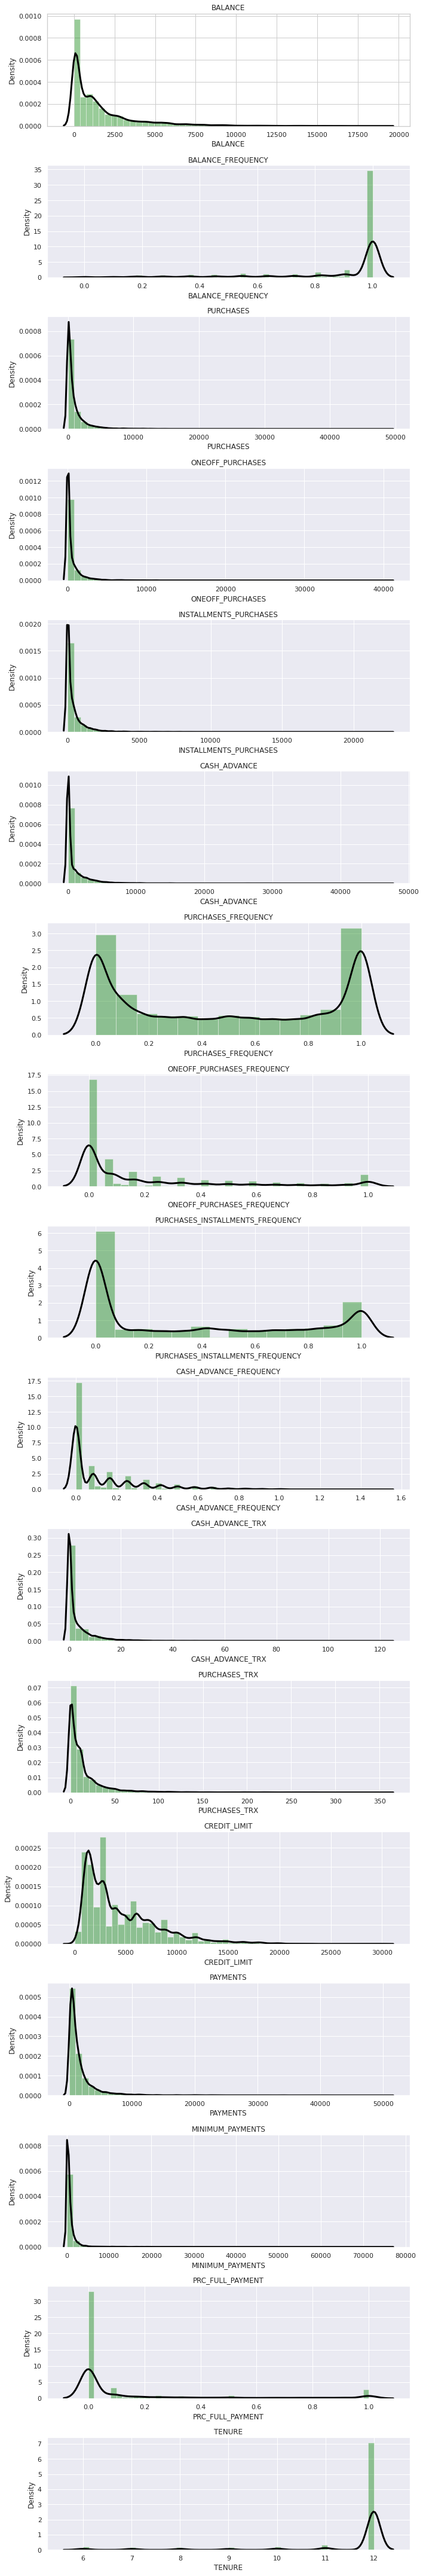

In [ ]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.set_style('darkgrid')
    sns.set_context("notebook")
    sns.distplot(df[df.columns[i]],kde_kws={'color':'black','bw': 0.1,'lw':3,'label':'KDE'},hist_kws={'color':'g'})
    plt.title(df.columns[i])
plt.tight_layout()

### Heatmap
The heatmap is a graphical representation of data that uses a system of color-coding to represent different values.
Here we can see that what the heatmap or heat map really does is it colors in those values based on some sort of gradient scale. It can be used to detect correlations, in our case, correlation between the features.
Thus, the closer the annotated value is to 1 the higher the correlation or using the color scale we say the brighter the color the higher the correlation.

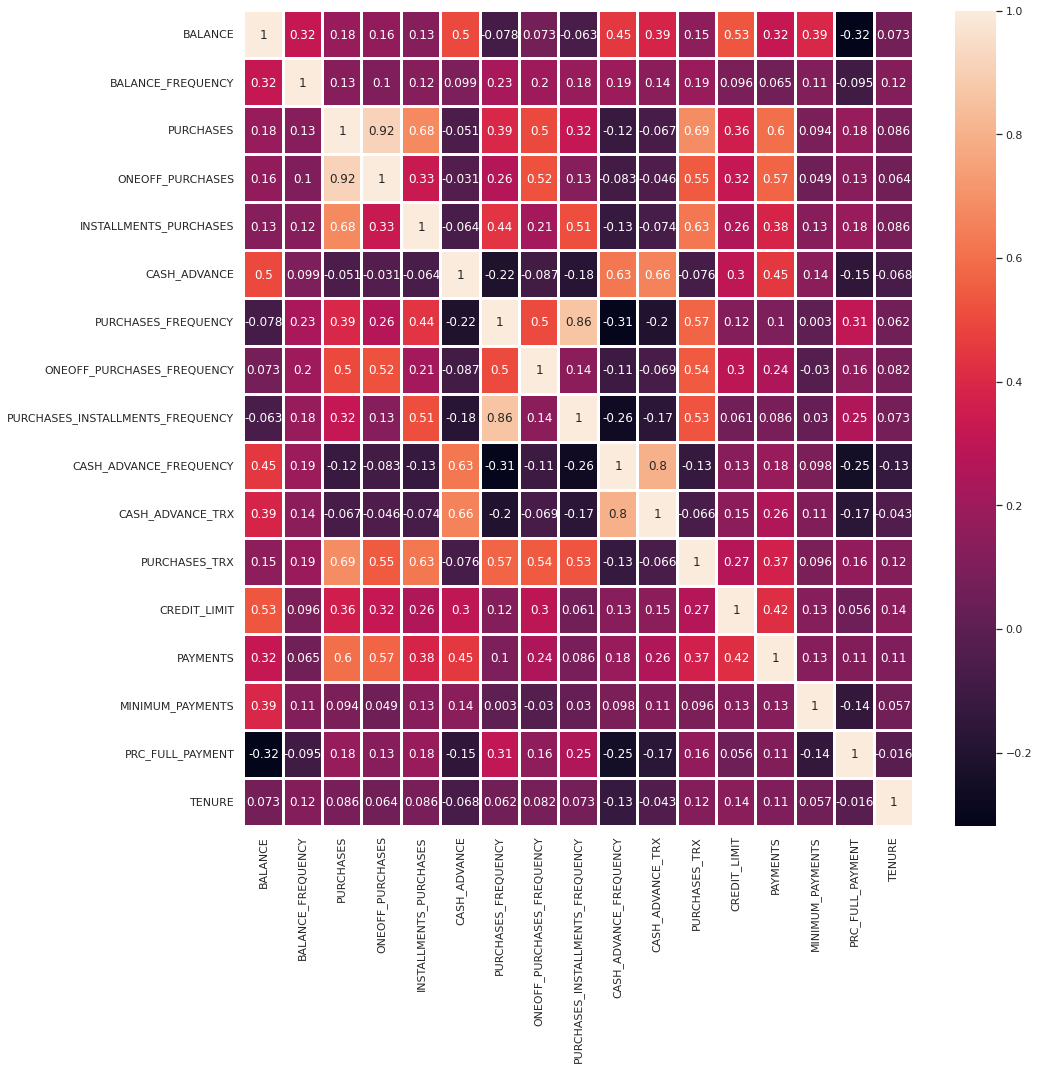

In [ ]:
#use of heatmap to visualize
plt.figure(figsize=(15,15))
sns.set_context("notebook")
sns.heatmap(df.corr(), annot=True,linecolor='white', linewidths=2)
plt.show()

From the above visual we can easily detect highly correlated features, such as purchase installment frequency and purchase frequency with a correlation value of 0.82 and also negative correlationss such as tenure and cash advance with a value of -0.068. And a lot more correations and none correlations can be found.

### Cluster Mapping
This visual method uses a hierarchical clusters to order data by similarity. This reorganizes the data for the rows and columns and displays similar content next to one another for even more and better depth of understanding the data.

<Figure size 1080x1080 with 0 Axes>

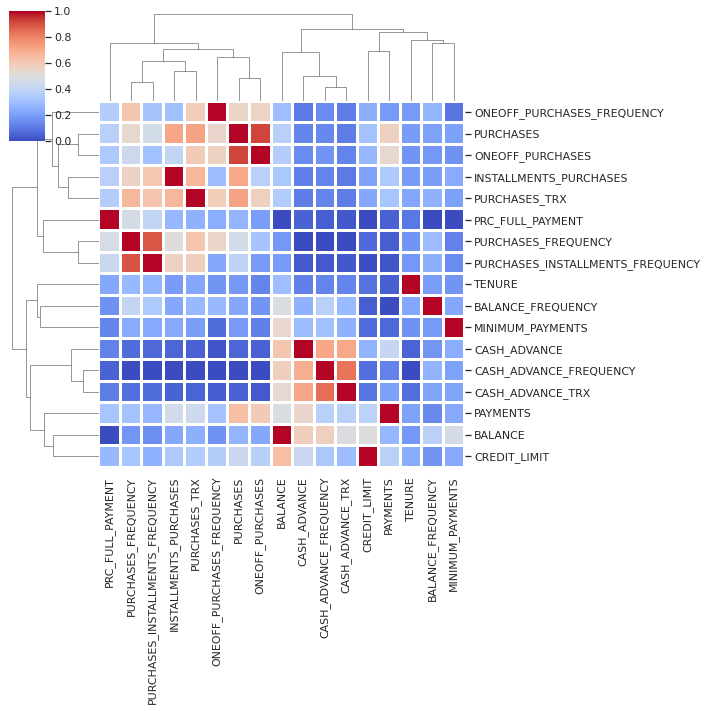

In [ ]:
#use of clusteredmap to visualize
plt.figure(figsize=(15,15))
sns.set_context("notebook")
sns.clustermap(df.corr(), cmap='coolwarm',standard_scale=1,linecolor='white', linewidths=2)
plt.show()

# Feature Scaling
Feature scaling is a method used to normalize the range of independent variables or features of data processing. It is also known as data normalization and is generally performed during the data preprocessing step.

Scaling the features makes the flow of gradient descent smooth and helps algorithms quickly reach the minima cost function.

Without scaling the features the algorithm may be biased towards the features which has values higher in magnitude.


+ Feature scaling refers to the methods used to normalize the
range of values of independent variables.
+ In other words, the methods to set the feature value range
within a similar scale.
+ Feature scaling is generally the last step in the data preprocessing pipeline, performed just before training the
machine learning algorithms.

Scaling methods
+ Standardisation
+ Mean normalisation
+ Scaling to maximum and minimum
+ Scaling to absolute maximum
+ Scaling to median and quantiles
+ Scaling to unit norm

For this project we will only be considering the Standardisation scaling method

## Standardisation


Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, **standardising a variable does not normalize the distribution of the data** and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.


In [ ]:
# calling the data (i.e df) and checking the description
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


The different variables present different value ranges, mean, max, min, standard deviations, etc. In other words, they show different magnitudes or scales. Note for this demo, how **the mean values are not centered at zero, and the standard deviations are not scaled to 1**.

Now the following code below will be to standardizing the data 

In [ ]:
#using scikit learn standardscaler fuction to scale dataset
scalar = StandardScaler().fit_transform(df)
column_names = list(df.columns)

scaled_df = pd.DataFrame(data=scalar, columns=column_names)


print("STANDARDIZED SCALED DATA","\n","--"*100,"\n")
scaled_df.head(6)

STANDARDIZED SCALED DATA 
 -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068


Above is the standardised scaled data using the standardised scaling method implemented with the scikit learn preprocessing python library.

### Standardisation

The StandardScaler from scikit-learn removes the mean and scales the data to unit variance. Plus, it learns and stores the parameters needed for scaling. Thus, it is top choice for this feature scaling technique.

On the downside, you can't select which variables to scale directly, it will scale the entire data set, and it returns a NumPy array, without the variable values.

In [ ]:
np.round(scaled_df.describe(), 1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0,8950.0
mean,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.8,-3.7,-0.5,-0.4,-0.5,-0.5,-1.2,-0.7,-0.9,-0.7,-0.5,-0.6,-1.2,-0.6,-0.4,-0.5,-4.1
25%,-0.7,0.0,-0.5,-0.4,-0.5,-0.5,-1.0,-0.7,-0.9,-0.7,-0.5,-0.6,-0.8,-0.5,-0.3,-0.5,0.4
50%,-0.3,0.5,-0.3,-0.3,-0.4,-0.5,0.0,-0.4,-0.5,-0.7,-0.5,-0.3,-0.4,-0.3,-0.2,-0.5,0.4
75%,0.2,0.5,0.1,-0.0,0.1,0.1,1.1,0.3,1.0,0.4,0.1,0.1,0.6,0.1,-0.0,-0.0,0.4
max,8.4,0.5,22.5,24.2,24.4,22.0,1.3,2.7,1.6,6.8,17.5,13.8,7.0,16.9,32.4,2.9,0.4


Recall, that it was noted that the Standardised scaling method gives a general mean of 0 and a general standard deviation of 1. This can be noticed from the above table at the **mean** and **std** rows

So, as expected, the mean of each variable, which were not centered at zero, is now around zero and the standard deviation is set to 1. 

Note however, that the minimum and maximum values vary according to how spread the variable was to begin with and is highly influenced by the presence of outliers.

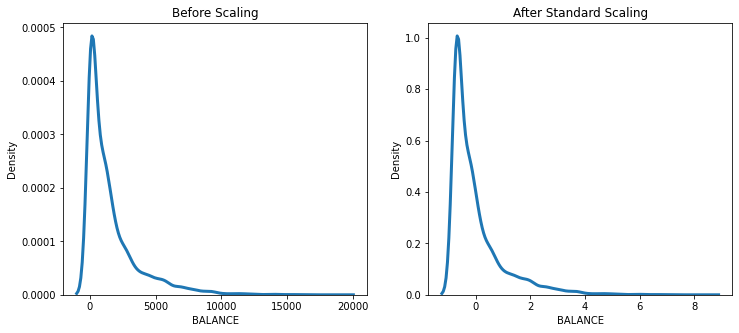

None


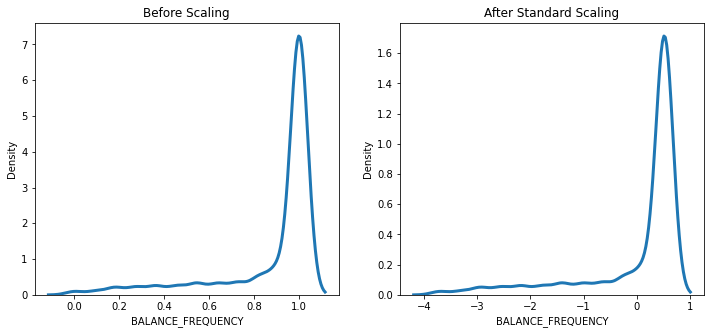

None


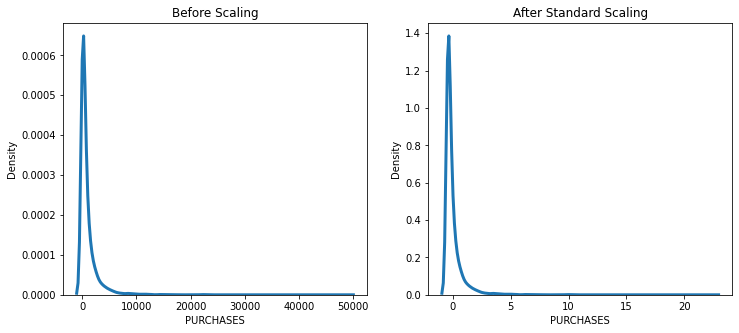

None


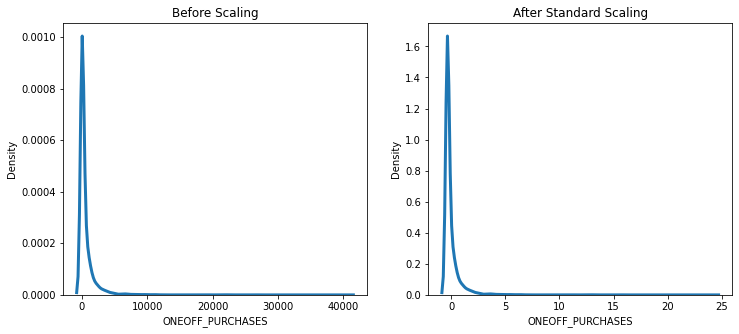

None


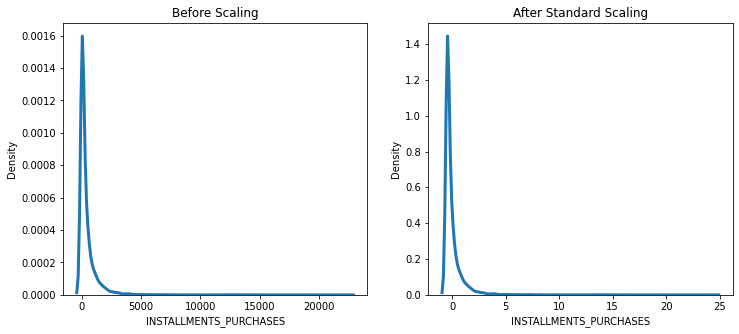

None


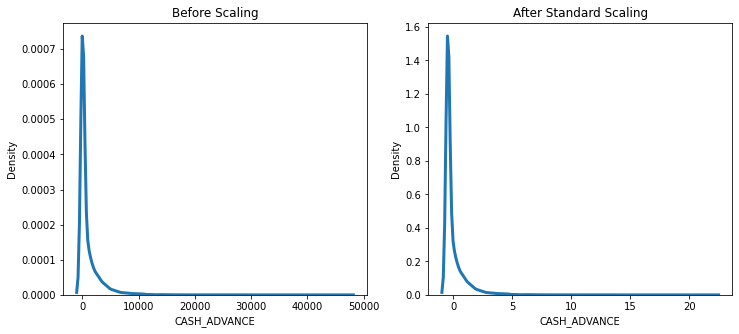

None


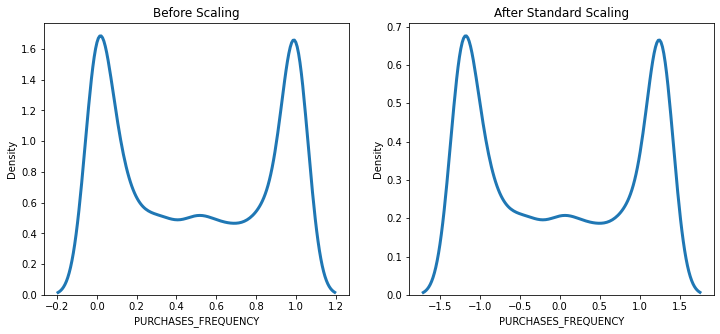

None


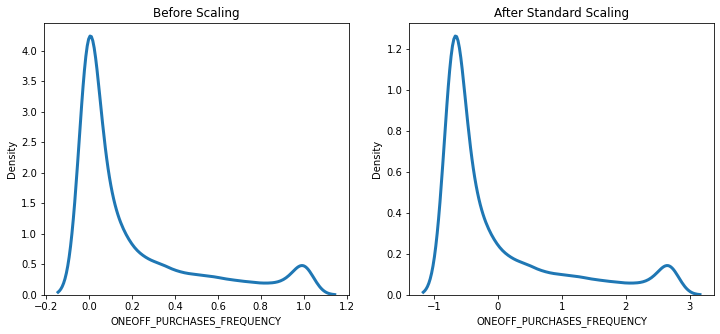

None


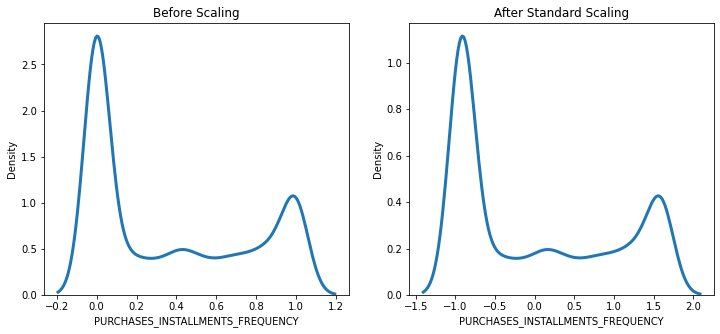

None


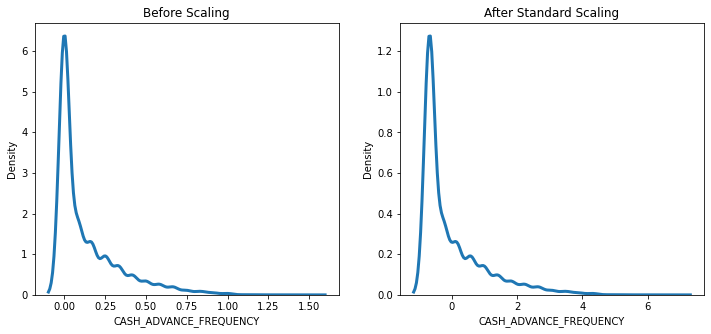

None


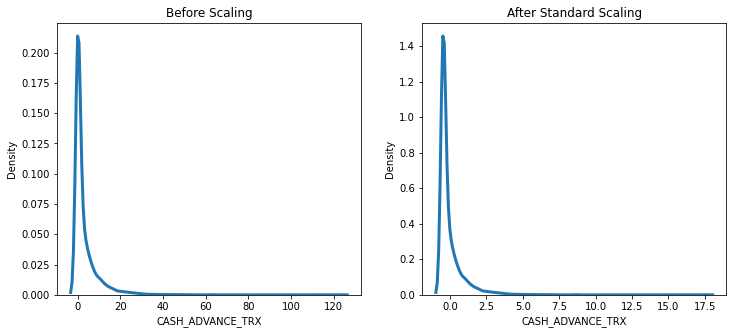

None


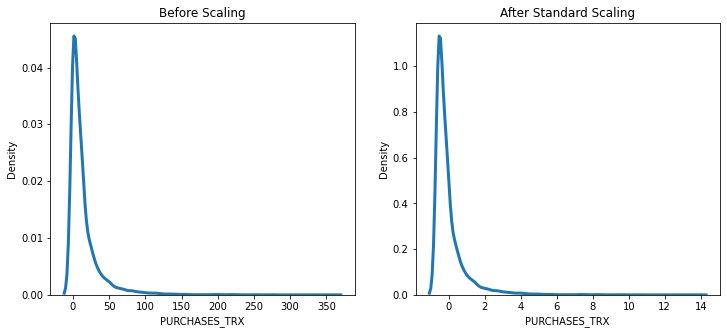

None


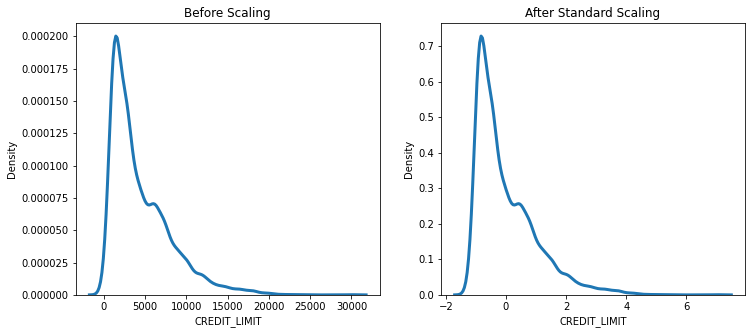

None


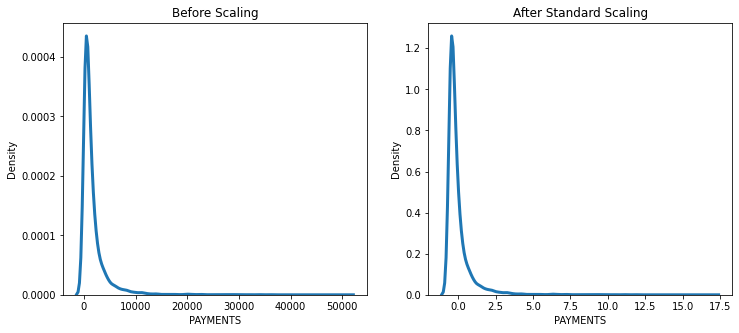

None


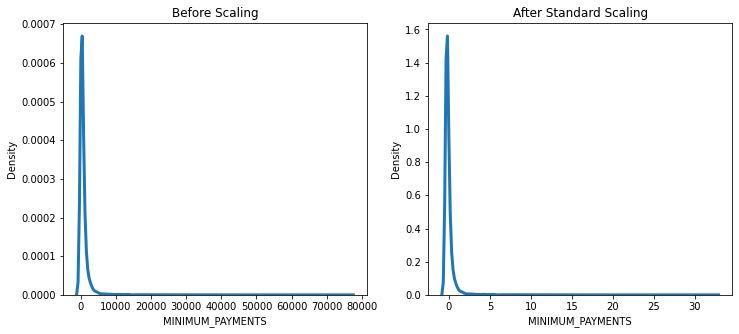

None


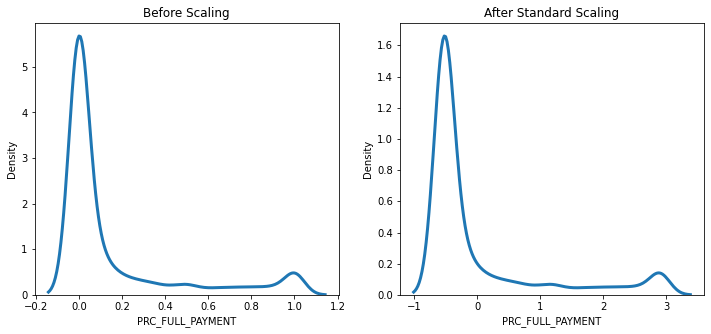

None


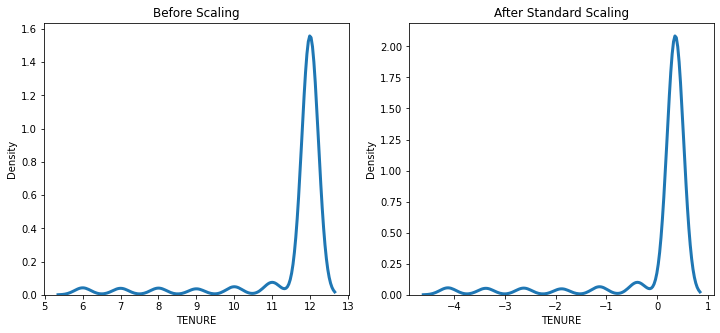

None


In [ ]:
 def check_distribution(feature=str()):
  """
  Function to compare the distribution between scaled data and unscaled data
  """
 # let's compare the variable distributions before and after scaling

  fig, (ax1, ax2,) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
  ax1.set_title('Before Scaling')
  sns.kdeplot(df[feature], linewidth=3, ax=ax1)

# # after scaling
  ax2.set_title('After Standard Scaling')
  sns.kdeplot(scaled_df[feature],linewidth=3, ax=ax2)
  plt.show()


for i in column_names:
  print(check_distribution(i))


Note from the above plots how standardisation centered all the distributions at zero, but it preserved their original distribution. The value range is not identical, but it looks more homogeneous across the variables.

So basically, the data is still the same only just transformed to enable compatibility with the models

# Principal Component Analysis 

This is basically a statistical procedure to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables. 
Each of the principal components is chosen in such a way so that it would describe most of them still available variance and all these principal components are orthogonal to each other. In all principal components first principal component has a maximum variance.
 

Uses of PCA: 

+ It is used to find inter-relation between variables in the data.
+ It is used to interpret and visualize data.
+ The number of variables is decreasing it makes further analysis simpler.
+ It’s often used to visualize genetic distance and relatedness between populations

Objectives of PCA: 

+ It is basically a non-dependent procedure in which it reduces attribute space from a large number of variables to a smaller number of factors.
+ PCA is basically a dimension reduction process but there is no guarantee that the dimension is interpretable.
+ The main task in this PCA is to select a subset of variables from a larger set, based on which original variables have the highest correlation with the principal amount

In our case, the PCA will be used for feature reduction to enable us perform further analysis

In [ ]:
#dimension reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682220,-1.076454
1,-1.138296,2.506461
2,0.969682,-0.383526
3,-0.873628,0.043160
4,-1.599434,-0.688582
...,...,...
8945,-0.359629,-2.016143
8946,-0.564368,-1.639119
8947,-0.926203,-1.810783
8948,-2.336550,-0.657958


Above is our reduced data set, comprising of 2 components , PCA1 and PCA2.


Now that we are done with the preprocessing, it's good for us to take not of all the data sets created in all our previous codes.
All data will be used during the model preparation.

The data available now are:
+ df: The origin data, i.e the raw data, which as also been cleaned.
+ scaled_df: The standardised scaled data
+

# USING KMEANS ALGORITHM

K Means Clustering is an unsupervised learning algorithm that will attempt to group similar clusters together in your data. 

So what does a typical clustering problem look like? 

In our case it's Cluster Customers based on Features.


The K Means Algorithm Process involves
+ Choose a number of Clusters “K” 
+ Randomly assign each point to a cluster
+ Until clusters stop changing, repeat the following: 
 - For each cluster, compute the cluster centroid by taking the mean vector of points in the cluster
 - Assign each data point to the clusterfor which the centroid is the closest cluster

# FINDING BEST K using popuplar test

#### How to Find the Optimal K for the cluster
+ Elbow Method
+ Silhouette Method


#### How to choose the best k - number for your cluster
+ Elbow method
 - First of all, compute the sum of squared error (SSE) for some values of k (for example 2, 4, 6, 8, etc.). The SSE is defined as the sum of the squared distance between each member of the cluster and its centroid. 
 -  If you plot k against the SSE, you will see that the error decreases as k gets larger; this is because when the number of clusters increases, they should be smaller, so distortion is also smaller.  The idea of the elbow method is to choose the k at which the SSE decreases abruptly. This produces an "elbow effect" in the graph, as you can see in the following picture:******

+ Silhoutte score
    - +1 : close to 1 means that datapoint is inside it own cluster
    - 0 : close to 0 means it is close to a cluster boundary
    - -1 : close to 1 means it is in a wrong cluster

Implementing Kmeans Algorithm and test for best K value

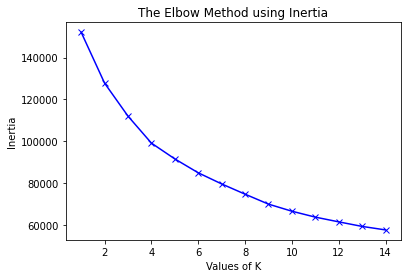

In [ ]:
#Elbow Method
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

Above is called the Elbow plot, next is to try an Locate the k value using the scikit learn library called kneed, as implemented below

In [ ]:
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
            x=range(1,15),
            y= inertia,
            S=0.1, curve="convex",direction="decreasing",online=True)

K_cost_c3 = cost_knee_c3.elbow
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

elbow at k = 5 clusters


And the values for K was gotten to be 5 by using the elbow method.

Next for checking and testing best K value will be the use of 
+ Silhouette Score 
+ Calinski Harabarsz
+ Davies Bouldin

Implementing the Silhouette Score as seen below, we get a new cluster value for K to be 3

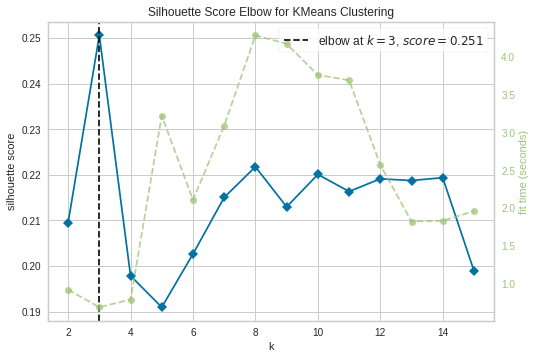

In [ ]:
# Silhouette Score for K means

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,16),metric='silhouette', timings= True)
visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Implementing the Calinski Harabasz Score we get K value to be 2.

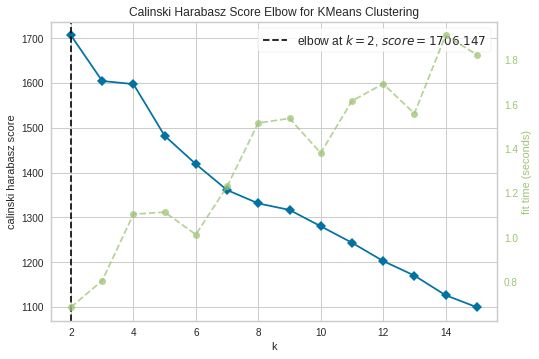

In [ ]:
# Calinski Harabasz Score for K means


model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,16),metric='calinski_harabasz', timings= True)
visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

And finally, by using the Davies Bouldin test, we get the value of K to be 2 as shown below.

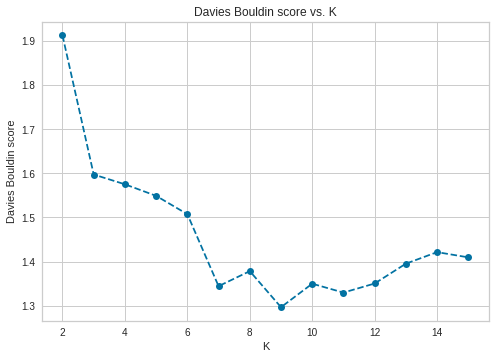

In [ ]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding Davies Bouldin for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the Davies Bouldin score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)
# Then fit the model to your data using the fit method
    model = kmeans.fit_predict(scaled_df)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(scaled_df, model)
    return score
scores = []
centers = list(range(2,16))
for center in centers:
    scores.append(get_kmeans_score(scaled_df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

Therefore we will be selecting K = 2 for building our Kmeans algorithm since we have two metrics that indicated K as 2, compared to the other metrics.

In [ ]:
#we pick K at 2 because both the Calinski Harabasz Score and Davies Bouldin Test gives k=2 as optimal.
kmeans_model=KMeans(2)
kmeans_model.fit_predict(scaled_df)
labels= kmeans_model.labels_
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)

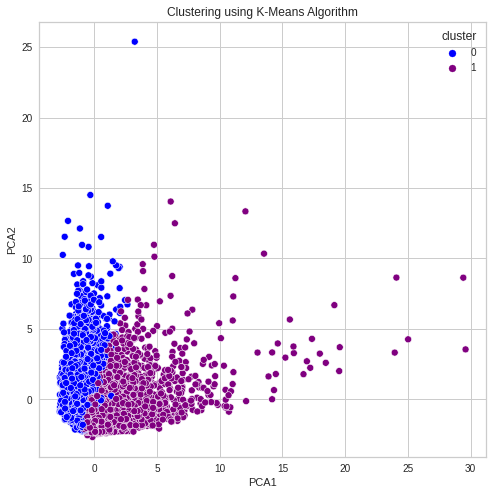

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['blue','purple'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

The above plot shows the clustering plot, created when using a kmeans algorithm to cluster points found to have similar features. With blue as a cluster and purple as another cluster

In [ ]:
#finding the cluster center
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])

In [ ]:
#inverse transdorming the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1698.633134,0.828787,276.020626,201.317779,74.982790,1366.805623,0.194873,0.088499,0.103963,0.189965,4.564809,3.348076,4067.768012,1413.695430,858.803930,0.070375,11.404940
1,1376.466018,0.945216,2022.277309,1140.550499,882.055356,435.221542,0.904431,0.362159,0.729465,0.058319,1.404615,30.632144,5092.398780,2180.817346,871.777738,0.270506,11.674805


In [ ]:
#Creating a target column "Cluster" for storing the cluster segment
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.4,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.0,773.17,773.17,0.00,0.0,1.000000,1.0,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,1
5,1809.828751,1.0,1333.28,0.00,1333.28,0.0,0.666667,0.0,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,1
6,627.260806,1.0,7091.01,6402.63,688.38,0.0,1.000000,1.0,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.00,12,1
7,1823.652743,1.0,436.20,0.00,436.20,0.0,1.000000,0.0,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,1
10,1293.124939,1.0,920.12,0.00,920.12,0.0,1.000000,0.0,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8936,108.977282,1.0,712.50,0.00,712.50,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,605.716356,86.868595,0.75,6,1
8940,130.838554,1.0,591.24,0.00,591.24,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,1
8942,40.829749,1.0,113.28,0.00,113.28,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,1
8945,28.493517,1.0,291.12,0.00,291.12,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,1


In [ ]:
#cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
#cluster_3_df

# CLUSTER VISUALIZATION

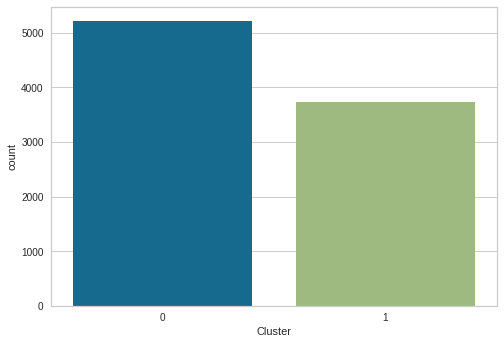

In [ ]:
sns.countplot(x='Cluster', data=cluster_df)

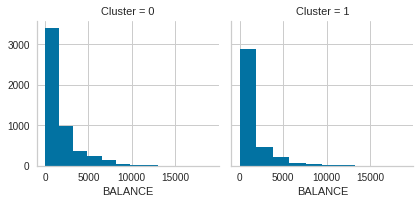

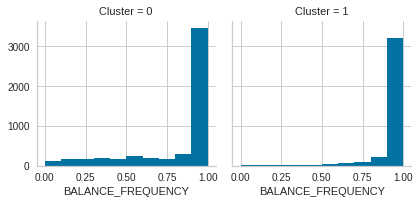

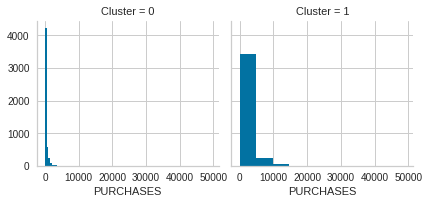

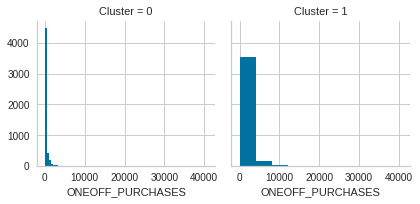

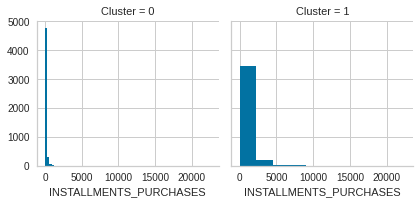

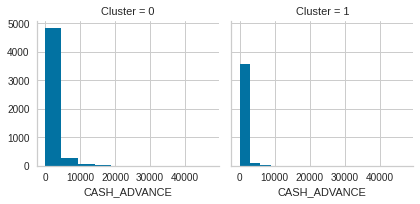

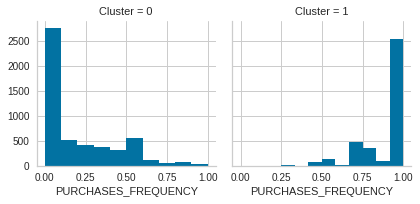

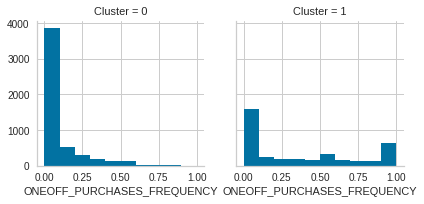

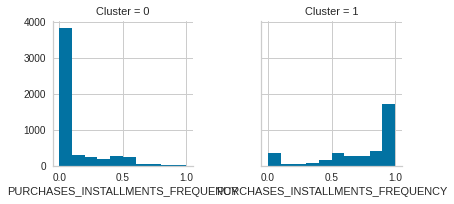

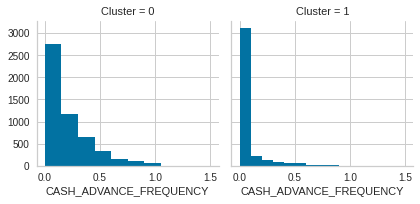

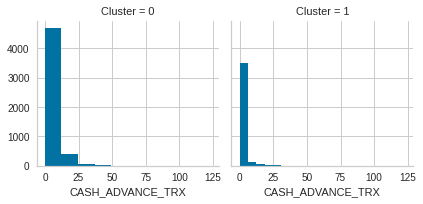

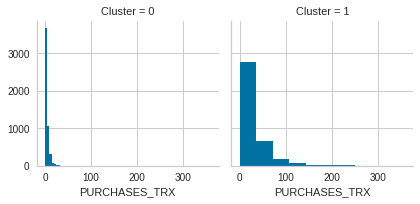

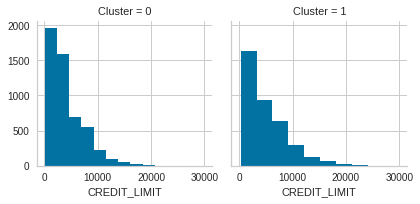

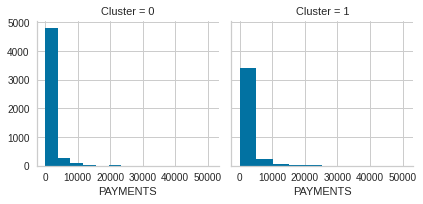

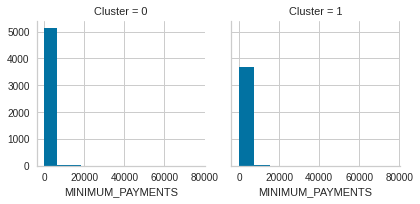

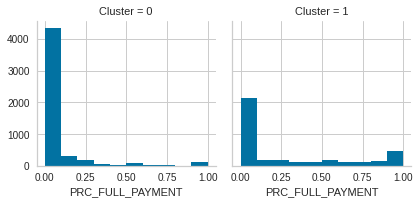

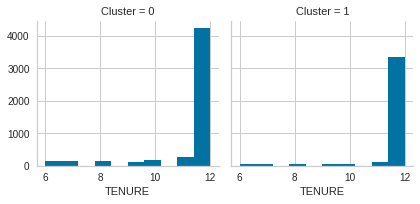

In [ ]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_df, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()



#Evaluation Metrics

Correctly measuring the performance of Clustering algorithms is key. This is especially true as it often happens that clusters are manually and qualitatively inspected to determine whether the results are meaningful.

we will go through the main metrics used to evaluate the performance of Clustering algorithms, to rigorously have a set of measures.

+ **Silhouette Score**:The Silhouette Score and Silhouette Plot are used to measure the separation distance between clusters. It displays a measure of how close each point in a cluster is to points in the neighbouring clusters. This measure has a range of [-1, 1] and is a great tool to visually inspect the similarities within clusters and differences across clusters.
The higher the Silhouette Coefficients (the closer to +1), the further away the cluster’s samples are from the neighbouring clusters samples. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighbouring clusters. Negative values, instead, indicate that those samples might have been assigned to the wrong cluster.
+ **Calinski Harabasz Index**: Calinski-Harabasz Index is also known as the Variance Ratio Criterion.The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The C-H Index is a great way to evaluate the performance of a Clustering algorithm as it does not require information on the ground truth labels.The higher the Index, the better the performance.
+ **Davies Bouldin Index**: The Davies-Bouldin index (DBI) is one of the clustering algorithms evaluation measures. It is most commonly used to evaluate the goodness of split by a K-Means clustering algorithm for a given number of clusters. In a few words, the score (DBI) is calculated as the average similarity of each cluster with a cluster most similar to it. The lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed.

In the next section the process of calculating  all the metrics listed above.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score,calinski_harabasz_score, davies_bouldin_score,rand_score, adjusted_mutual_info_score, mutual_info_score

In [ ]:
def performance_metric(label):
  """
    Function to for evaluation metrics
  """

  shil_score = silhouette_score(scaled_df, label, metric='euclidean')*100
 # return('Silhouette_score: %.3f' % shil_score)


  db_score = davies_bouldin_score(scaled_df, label)
  #return('Silhouette_score: %.3f' % shil_score,'\n','Davies Bouldin_score: %.3f' % db_score,'\n','Calinski Harabasz_score: %.3f' % cali_score)


  cali_score = calinski_harabasz_score(scaled_df, label)
 # return('Calinski Harabasz_score: %.3f' % cali_score)
  print('Silhouette_score: %.3f' % shil_score,'\n','Davies Bouldin_score: %.3f' % db_score,'\n','Calinski Harabasz_score: %.3f' % cali_score)

performance_metric(labels)

Silhouette_score: 20.964 
 Davies Bouldin_score: 1.912 
 Calinski Harabasz_score: 1706.145


The output above displays all the metrics and their various score. 

The idea is to try out other algorithms like the DBSCAN and also the Agglomerative clustering algorithm, then perform all this same step, down to the performance evaluation techniques. After which we use the performance evaluation technique to check the best clustering algorithm for thus data set.

### Clustering using Hierarchical Clustering
+ Hierarchical Clustering: the process of building a hierarchy or ordering of clusters till only one cluster is left
    
#### Types of Hierarchical Clustering
+ Additive(Agglomerative) hierarchical clustering
    - Agglomerate (merge or join)
    - Assign each point to a cluster
    - Merge/Join closes pairs of clusters into one
    - Repeat until you have a single cluster
    - You keep on adding or joining clusters 

+ Divisive hierarchical clustering
    - Opposite of Additive
    - Start with a single large cluster
    - Divide/Split the farthest point in the cluster
    - Repeat until each cluster only contains a single data point
    
    
#### Terms
+ Similarity Distance
+ Proximity Matrix: it stores the distances between each point
+ Dendogram: used to find the number of clusters
    - A dendrogram is a tree-like diagram that records the sequences of merges or splits.
    - The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

#### Agglomerative Hierarchical Clustering
+ Merging clusters
+ Dendogram to detect n_clusters to use and end at

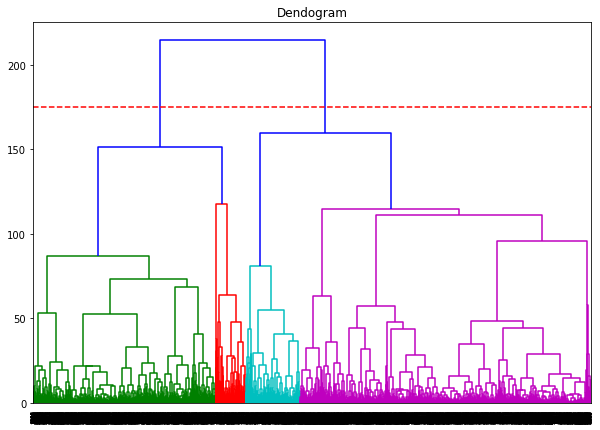

In [ ]:

#importing the library for Agglomerative clustering
import scipy.cluster.hierarchy as shc
# from sklearn.cluster import AgglomerativeClustering

#Detecting Number of Clusters using Dendogram
plt.figure(figsize= (10,7))
plt.title("Dendogram")
dend = shc.dendrogram(shc.linkage(scaled_df, method='ward'))
plt.axhline(y= 175, color='r', linestyle='--')

Using the dendogram diagram shown above, we detect that the number of clusters suitable for the Agglomerative clustering will be 2. This is gotten by the number of point the red line intersects.


Next would be the implementation of the algorithm with clusters attribute equated to 2.

In [ ]:
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster_hcl = hcluster.fit_predict(scaled_df)

cluster_hcl

scaled_df['cluster']= cluster_hcl

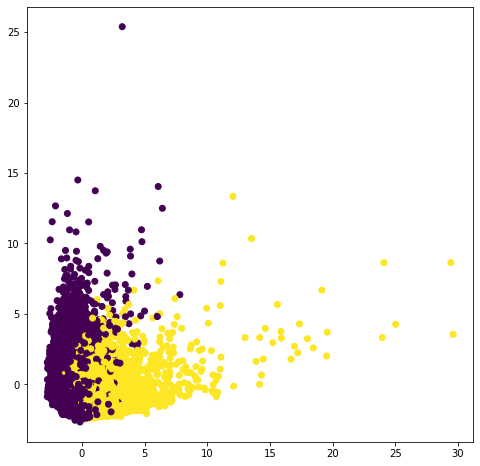

In [ ]:
df_cluster_pca = pd.concat([pca_df, pd.DataFrame({'cluster':cluster_hcl})], axis=1)

#Plot
plt.figure(figsize=(8,8))
plt.scatter(df_cluster_pca['PCA1'],df_cluster_pca['PCA2'],c=df_cluster_pca['cluster'])

The plot above shows the clustering derived by the Agglomerative clustering technique.

### Performance Evaluation

In [ ]:
performance_metric(cluster_hcl)

Silhouette_score: 19.392 
 Davies Bouldin_score: 1.966 
 Calinski Harabasz_score: 1568.766


# USING DBSCAN

+ DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise
+ It refers to an unsupervised learning methods that identify distinctive groups/clusters in the data, based on the idea that a cluster in data space is a contiguous region of high point density, separated from other such clusters by contiguous regions of low point density.(kdnuggets)
+ 

+ DBSCAN is a base algorithm for density-based clustering. 
+ It can discover clusters of different shapes and sizes from a large amount of data

#### Usefulness
+ Unsupervised ML
+ Outlier Detection
+ Noise detection


#### Terms
The DBSCAN algorithm uses two parameters:
+ eps (ε): A distance measure that will be used to locate the points in the neighborhood of any point.

+ minPts: The minimum number of points (a threshold) clustered together for a region to be considered dense.
    - minPt >= Dimensions of dataset + 1

+ Core point — This is a point that has at least m points within distance n from itself.
+ Border — This is a point that has at least one Core point at a distance n.
+ Noise — This is a point that is neither a Core nor a Border. And it has less than m points within distance n from itself.

These parameters can be understood if we explore two concepts called Density Reachability and Density Connectivity.

Reachability in terms of density establishes a point to be reachable from another if it lies within a particular distance (eps) from it.

Connectivity, on the other hand, involves a transitivity based chaining-approach to determine whether points are located in a particular cluster. For example, p and q points could be connected if p->r->s->t->q, where a->b means b is in the neighborhood of a.

![](dbscan_graph.png)

![](dbscan_terms.png)

In [ ]:

#importing the required libraries
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

implementing DBSCAN with Elbow Method to get the best number of clusters just as was done for the kMeans algorithm

min samples: 38
shape of distance matrix: (8950, 38)



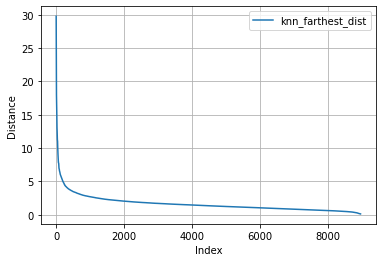

elbow at k = 2 clusters


In [ ]:
# finding the best value of eps to use
min_samples = scaled_df.shape[1]*2
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors=k).fit(scaled_df)
distance, indices = nbrs.kneighbors(scaled_df)

print("min samples: "+ str(min_samples))
print("shape of distance matrix: "+ str(distance.shape)+"\n")

# the last cell represents the distance of the Kth farthest point
scaled_df['knn_farthest_dist'] = distance[:,-1]
#scaled_df.head()

df.sort_values('knn_farthest_dist', ascending=False).reset_index()[['knn_farthest_dist']].plot()
plt.xlabel('Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


#!pip install kneed
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
            x=scaled_df['knn_farthest_dist'],
            y=range(0,8950),
            S=0.1, curve="convex",direction="decreasing",online=True)

K_cost_c3 = cost_knee_c3.elbow
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

From the above output, the best value is 2 

**NOTE: That in the case of DBSCAN we are using the elbow method to find the best eps value**

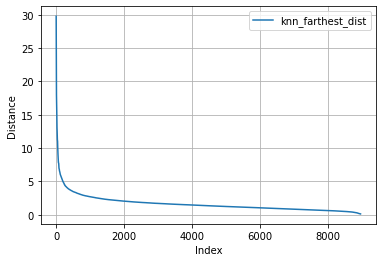

elbow at k = 2 clusters


In [ ]:
df.sort_values('knn_farthest_dist', ascending=False).reset_index()[['knn_farthest_dist']].plot()
plt.xlabel('Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


#!pip install kneed
from kneed import KneeLocator
cost_knee_c3 = KneeLocator(
            x=scaled_df['knn_farthest_dist'],
            y=range(0,8950),
            S=0.1, curve="convex",direction="decreasing",online=True)

K_cost_c3 = cost_knee_c3.elbow
print("elbow at k =", f'{K_cost_c3:.0f} clusters')

Another approach to finding the best eps value is by using the idea or trying to find the best clusterings with the lesser amount of noise (for DBSCAN clusters classified as -1 are called noise).

To do this;
+ we would create our own function to  to check the number of clusters made by the algorithm when a certain value for eps is imputed 

+ Next we would use the elbow estimate "2" as our boundary, and iterate our function through 1 and 2 with a step or 0.1. Just to actively see the performance of the model when a certain value in the range is considered by the model.

+ After which we finally pick the eps value which has the lowest amount of noise and more significant clustering.

**NOTE: If we have an output which seems to have 2 clusters, for examples output with classification of 0 and -1, this should be taken as one cluster. For the DBSCAN approach, -1 is not a cluster but a noise**.

In [ ]:

#Function to check the number of clusters i = eps value
def dbscan_cluster_checker(i):
  """
   Function to check the number of clusters
   i = eps value
  """
  km= DBSCAN(eps=i, min_samples=min_samples)
  scaled_df['cluster'] = km.fit_predict(scaled_df[column_names])

  print("At eps={}\n".format(i),scaled_df.cluster.value_counts())
  print("--"*100,'\n')

In [ ]:

#checking for lesser noise value by iterating from 1 to 2 with an interval of 0.1
start = 1.0

stop = 2.0

step = 0.1


float_range_array = np.arange(start, stop, step)

float_range_list = list(float_range_array)


for i in float_range_list:
  print(dbscan_cluster_checker(i))

At eps=1.0
 -1    4793
 0    4110
 1      47
Name: cluster, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

None
At eps=1.1
  0    4709
-1    4155
 2      54
 1      32
Name: cluster, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

None
At eps=1.2000000000000002
  0    5222
-1    3670
 1      58
Name: cluster, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 

None
At eps=1.3000000000000003
  0    5711
-1    3239
Name: cluster, dtype: int64
------------------------------------------------------

Recall that it's the eps value that produces a lesser number of noise i.e, -1, and significant clusters, which in our case would be **1.5**.


###Implementing DBSCAN with eps=1.5

At eps=1.5
  0    6530
-1    2311
 1     109
Name: cluster, dtype: int64
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- 



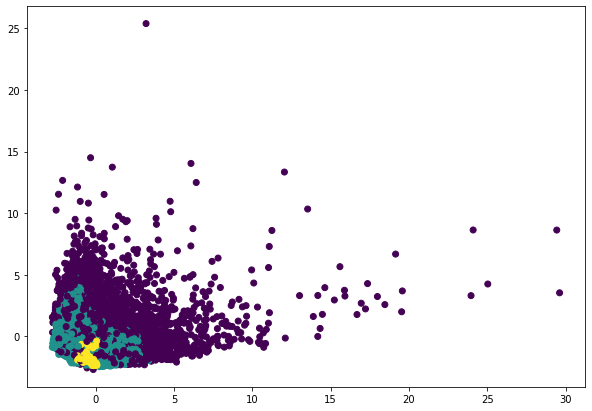

In [ ]:
dbscan_cluster_checker(1.5)


df_cluster_pca = pd.concat([pca_df, scaled_df['cluster']], axis=1)

df_cluster_pca.cluster.value_counts()

plt.figure(figsize=(10,7))
plt.scatter(df_cluster_pca['PCA1'],df_cluster_pca['PCA2'],c=df_cluster_pca['cluster'])

The above plot displaces the clustering performed by DBSCAN.

##Performance Metric

In [ ]:
performance_metric(scaled_df.cluster)

Silhouette_score: 18.573 
 Davies Bouldin_score: 1.794 
 Calinski Harabasz_score: 825.403
